In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import pywt

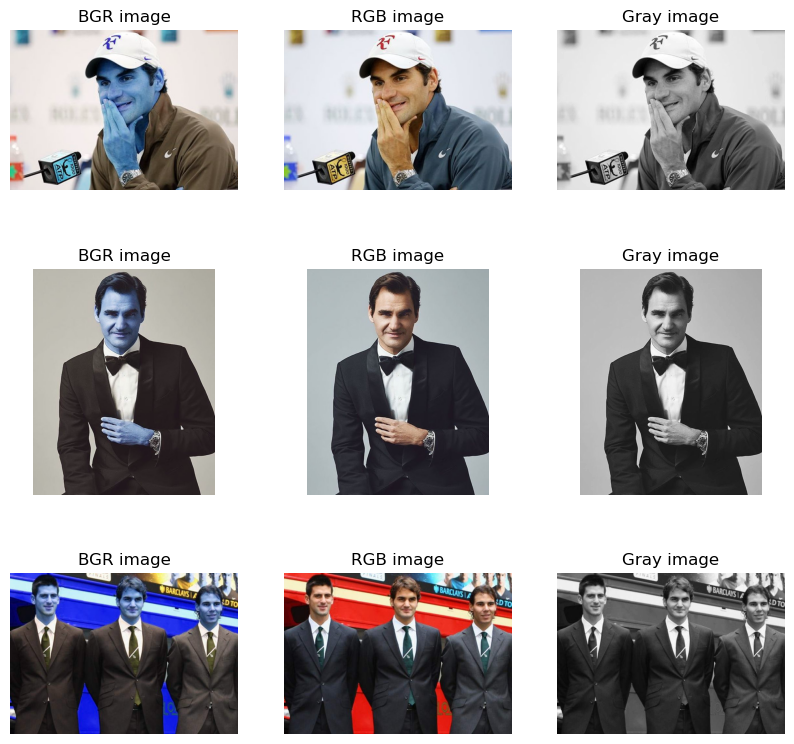

In [2]:
path_img_tests = [('./test_images/federer'+str(i)+'.jpg') for i in range(1,4)]
plt.figure(figsize=(10,10))
for i in range(1,4):
    img_test = cv2.imread(path_img_tests[i-1])
    plt.subplot(3,3,3*(i-1) + 1), plt.imshow(img_test)
    plt.title('BGR image')
    plt.axis('off') 
    img_rgb = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,3*(i-1) + 2), plt.imshow(img_rgb)
    plt.title('RGB image')
    plt.axis('off') 
    img_gray = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)
    plt.subplot(3,3,3*(i-1) + 3), plt.imshow(img_gray, cmap = 'gray')
    plt.title('Gray image')
    plt.axis('off') 
plt.show()

In [3]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

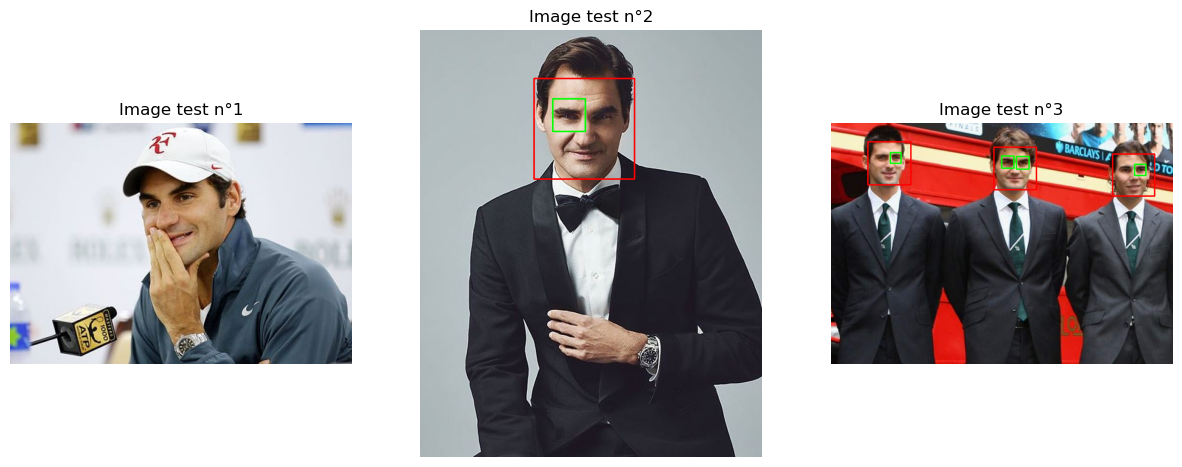

In [4]:
index_subplot=0
plt.figure(figsize=(15, 15))
for img_path in path_img_tests:
    index_subplot += 1
    image = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(img_gray, scaleFactor=1.2, minNeighbors=5)
    face_img = img_rgb.copy()
    for (x,y,w,h) in face:
        face_img = cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = img_gray[y:y+h, x:x+w]
        roi_rgb = face_img[y:y+h, x:x+w]
        eyes = eyes_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_rgb,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    plt.subplot(1,3,index_subplot), plt.imshow(face_img, cmap='gray')
    plt.axis('off')
    plt.title('Image test n°' + str(index_subplot))
plt.show()

In [5]:
def crop_faces_from_full_image(image):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cropped_images = []
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img_gray, scaleFactor=1.2, minNeighbors=5)
    if len(faces) == 0:
        return None
    for (x, y, w, h) in faces:
        roi_gray = img_gray[y:y+h, x:x+w]
        roi_color = img_rgb[y:y+h, x:x+w]
        eyes = eyes_cascade.detectMultiScale(roi_gray)
        if len(eyes) > 0:
            cropped_images.append(roi_color)
    if len(cropped_images) == 0:
        return None
    return cropped_images

def save_cropped_image(image, count, name):
    cropped_images = crop_faces_from_full_image(image)
    if cropped_images is None:
        return
    output_dir = f'./images_dataset/cropped/{name}'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for index, face in enumerate(cropped_images):
        filename = os.path.join(output_dir, f'{count}_{index}.jpg')
        cv2.imwrite(filename, cv2.cvtColor(face, cv2.COLOR_RGB2BGR)) 

In [6]:
import shutil
path_cropped_data = './images_dataset/cropped/'
if os.path.exists(path_cropped_data):
    shutil.rmtree(path_cropped_data)
os.mkdir(path_cropped_data)

In [7]:
import os
img_dirs = []
for entry in os.scandir('./images_dataset/'):
    if entry.is_dir():
        if entry.path=='./images_dataset/cropped':
            pass
        else:
            img_dirs.append(entry.path)

In [8]:
print(img_dirs)

['./images_dataset/serena_williams', './images_dataset/roger_federer', './images_dataset/virat_kohli', './images_dataset/lionel_messi', './images_dataset/maria_sharapova']


In [9]:
img_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp', '.jfif']
for celebrity_dir in img_dirs:
    pict_index = 0
    cel_name = celebrity_dir.split('/')[-1]
    print('Cropping images of '+cel_name+' ...')
    if os.path.exists(path_cropped_data+cel_name):
        shutil.rmtree(path_cropped_data+cel_name)
    os.mkdir(path_cropped_data+cel_name)
    for file in os.scandir(celebrity_dir):
        if file.is_file():
            if os.path.splitext(file.name)[1].lower() in img_extensions:
                image = cv2.imread(file.path)
                save_cropped_image(image, pict_index, cel_name)
                pict_index+=1
            else:
              print(f'The extension used here ({os.path.splitext(file.name)[1].lower()}) is not suitable for the processing required to classify images.') 
print('Cropping done !')

Cropping images of serena_williams ...
Cropping images of roger_federer ...
Cropping images of virat_kohli ...
Cropping images of lionel_messi ...
Cropping images of maria_sharapova ...
Cropping done !


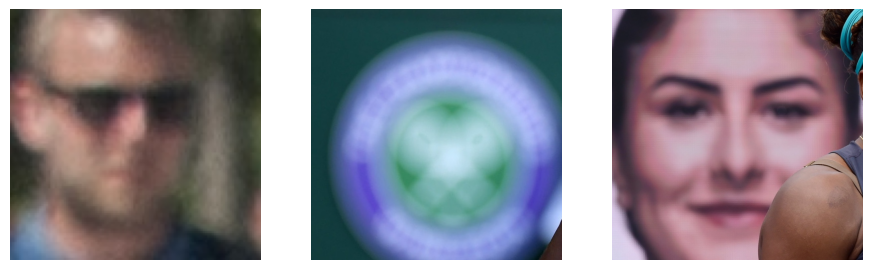

In [10]:
index_subplot = 0
plt.figure(figsize=(11, 11))
for outlier_ex in os.scandir('./outliers_examples'):
    index_subplot += 1
    im_out = cv2.imread(outlier_ex.path)
    im_out = cv2.cvtColor(im_out, cv2.COLOR_BGR2RGB)
    plt.subplot(1,3,index_subplot), plt.imshow(im_out)
    plt.axis('off')
plt.show()

Outliers and duplicals removing

In [11]:
outliers_index_serena = ['2_0','2_1','5_0','5_1','5_2','5_3','5_4','5_5','5_6','7_1','11_1','16_1','16_2','17_0','25_0','32_0','35_1','38_0','42_0','50_1','51_0','53_1','54_1','54_2','64_0','64_1']
outliers_index_roger = ['21_1','21_2','21_3','30_0','30_1','33_1','44_1','46_1']
outliers_index_virat = ['16_1','20_1','26_0','34_0','35_0','35_1','36_1','55_0','72_0','78_0','96_0','99_0']
outliers_index_lionel = ['5_1','5_2','6_0','24_0','24_1','33_1','33_2','34_1','38_0','38_1','38_2','38_3','55_1']
outliers_index_maria = ['2_1','26_2','26_3','31_0','31_2','39_0','39_1','39_2','41_1','48_1','62_0']

In [12]:
dict_outl = {
    'sw' :{
        'crop_folder_path':'./images_dataset/cropped/serena_williams',
        'outliers_index':['2_0','2_1','5_0','5_1','5_2','5_3','5_4','5_5','5_6','7_1','11_1','16_1','16_2','17_0','25_0','32_0','35_1','38_0','42_0','50_1','51_0','53_1','54_1','54_2','64_0','64_1'],
        'target_label':1
    }, 
    'rf' :{
        'crop_folder_path':'./images_dataset/cropped/roger_federer',
        'outliers_index':['21_1','21_2','21_3','30_0','30_1','33_1','44_1','46_1'],
        'target_label':2
    },
    'vk' :{
        'crop_folder_path':'./images_dataset/cropped/virat_kohli',
        'outliers_index':['16_1','20_1','26_0','34_0','35_0','35_1','36_1','55_0','72_0','78_0','96_0','99_0'],
        'target_label':3
    },
    'lm' :{
        'crop_folder_path':'./images_dataset/cropped/lionel_messi',
        'outliers_index':['5_1','5_2','6_0','24_0','24_1','33_1','33_2','34_1','38_0','38_1','38_2','38_3','55_1'],
        'target_label':4
    },
    'ms' :{
        'crop_folder_path':'./images_dataset/cropped/maria_sharapova',
        'outliers_index':['2_1','26_2','26_3','31_0','31_2','39_0','39_1','39_2','41_1','48_1','62_0'],
        'target_label':5
    }
}
    

In [13]:
for athlete, dict_params in dict_outl.items():
    for index in dict_params['outliers_index']:
        os.remove(dict_params['crop_folder_path']+'/'+index+'.jpg')

In [14]:
def wavelet_transform(image, mode='haar', level=1):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray = np.float32(gray)
    gray = gray/255
    coeffs_wt = pywt.wavedec2(gray, mode, level = level)
    coeffs_h = list(coeffs_wt)
    coeffs_h[0] = coeffs_h[0]*0
    gray_h = pywt.waverec2(coeffs_h, mode)
    gray_h = gray_h*255
    gray_h = np.uint8(gray_h)
    return gray_h

In [15]:
from sklearn.decomposition import PCA

def pca_transform(image, n_components=50):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray_flat = gray.flatten().astype(float)
    pca = PCA(n_components=n_components)
    pca_features = pca.fit_transform([gray_flat])
    
    return pca_features

In [16]:
from skimage.feature import local_binary_pattern

def lbp_transform(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    radius = 1 
    n_points = 8 * radius
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    return lbp

In [17]:
def hog_transform(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    hog = cv2.HOGDescriptor()
    hog_features = hog.compute(gray)
    return hog_features

In [18]:
def sift_transform(image, N=102):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    if descriptors is None:
        return np.zeros((1, 128))
    if len(descriptors) > N:
        return descriptors[:N]
    else:
        # Pad with zeros if there are less than N descriptors
        padded_descriptors = np.zeros((N, 128))
        padded_descriptors[:len(descriptors), :] = descriptors
        return padded_descriptors


In [19]:
X_raw=[]
X_wav=[]
X_pca=[]
X_lbp=[]
X_hog=[]
X_sift=[]
y=[]
for _, dict_params in dict_outl.items():
    for file in os.scandir(dict_params['crop_folder_path']):
        raw_image = cv2.imread(file.path)
        scaled_raw = cv2.resize(raw_image, (128,128))
        scaled_raw = cv2.cvtColor(scaled_raw, cv2.COLOR_BGR2RGB)
        img_har =  wavelet_transform(scaled_raw, 'db1', 5)
        img_lbp = lbp_transform(scaled_raw)
        img_hog = hog_transform(scaled_raw)
        img_sift = sift_transform(scaled_raw, N=102)
        X_raw.append(scaled_raw)
        X_wav.append(img_har)
        X_lbp.append(img_lbp)
        X_hog.append(img_hog)
        X_sift.append(img_sift)
        y.append(dict_params['target_label'])

In [20]:
X_sift[8].shape

(102, 128)

In [21]:
X_raw[2].shape

(128, 128, 3)

(-0.5, 127.5, 101.5, -0.5)

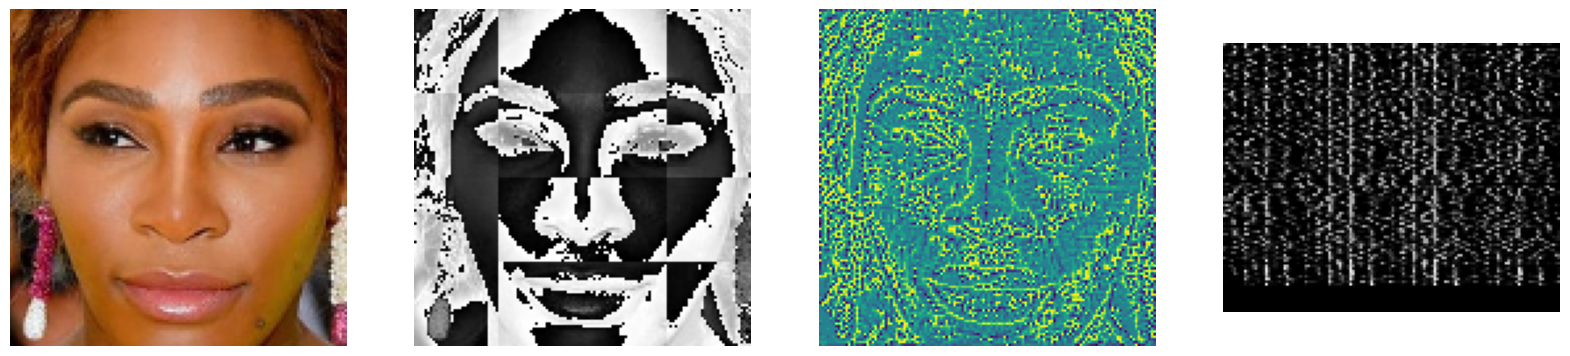

In [22]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,1),plt.imshow(X_raw[0])
plt.axis('off')
plt.subplot(1,4,2),plt.imshow(X_wav[0], cmap = 'gray')
plt.axis('off')
plt.subplot(1,4,3),plt.imshow(X_lbp[0])
plt.axis('off')
# plt.subplot(1,5,4),plt.imshow(X_hog[0], cmap = 'gray')
# plt.axis('off')
plt.subplot(1,4,4),plt.imshow(X_sift[0], cmap = 'gray')
plt.axis('off')

In [23]:
X_raw = [(image.flatten() - image.min())/(image.max()-image.min()) for image in X_raw]
X_wav = [(image.flatten() - image.min())/(image.max()-image.min()) for image in X_wav]
X_lbp = [(image.flatten() - image.min())/(image.max()-image.min()) for image in X_lbp]
X_sift = [(image.flatten() - image.min())/(image.max()-image.min()) for image in X_sift]
X_hog = [(image.flatten() - image.min())/(image.max()-image.min()) for image in X_hog]

In [24]:
listta=[]
for elem in X_sift:
    listta.append(elem.shape[0])
print(np.min(listta),np.max(listta),np.quantile(listta,0.75))

13056 13056 13056.0


In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
parameters={
    'svm':{
        'model':SVC(),
        'params':{
            'C':[1,5,10],
            'kernel':['rbf','linear'],
            'gamma':['scale','auto']
        }
    },
    'rf':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[100,1000],
            'criterion':['gini','entropy']
        }
    },
    'lr':{
        'model':LogisticRegression(max_iter=1000, solver='liblinear'),
        'params':{
            'fit_intercept':[True,False],
            'penalty':['l1', 'l2'] 
        }
    },
    'knn':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[3,5,7,10],
            'weights':['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree']
        }
    }
}                         

Raw images

In [27]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=11)
for model_name, model_params in parameters.items():
    gscv = GridSearchCV(model_params['model'], model_params['params'], cv = 5, verbose = 1, n_jobs = -1)
    gscv.fit(X_train, y_train)
    print(f'The best validation accuracy for {model_name} is {gscv.best_score_}, achieved with the following parameters: {gscv.best_params_} \n')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
The best validation accuracy for svm is 0.820870870870871, achieved with the following parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'} 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best validation accuracy for rf is 0.815015015015015, achieved with the following parameters: {'criterion': 'gini', 'n_estimators': 1000} 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best validation accuracy for lr is 0.8367867867867869, achieved with the following parameters: {'fit_intercept': True, 'penalty': 'l2'} 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
The best validation accuracy for knn is 0.6962462462462462, achieved with the following parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'} 

CPU times: user 1min 16s, sys: 38.3 s, total: 1min 55s
Wall time: 3min 19s


Wav images

In [28]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X_wav, y, test_size=0.2, random_state=11)
for model_name, model_params in parameters.items():
    gscv = GridSearchCV(model_params['model'], model_params['params'], cv = 5, verbose = 1, n_jobs = -1)
    gscv.fit(X_train, y_train)
    print(f'The best validation accuracy for {model_name} is {gscv.best_score_}, achieved with the following parameters: {gscv.best_params_} \n')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
The best validation accuracy for svm is 0.7714714714714715, achieved with the following parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'} 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best validation accuracy for rf is 0.7932432432432434, achieved with the following parameters: {'criterion': 'entropy', 'n_estimators': 1000} 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best validation accuracy for lr is 0.7331831831831832, achieved with the following parameters: {'fit_intercept': True, 'penalty': 'l2'} 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
The best validation accuracy for knn is 0.581981981981982, achieved with the following parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'} 

CPU times: user 29.2 s, sys: 8.98 s, total: 38.2 s
Wall time: 1min 15s


LBP images

In [29]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X_lbp, y, test_size=0.2, random_state=11)
for model_name, model_params in parameters.items():
    gscv = GridSearchCV(model_params['model'], model_params['params'], cv = 5, verbose = 1, n_jobs = -1)
    gscv.fit(X_train, y_train)
    print(f'The best validation accuracy for {model_name} is {gscv.best_score_}, achieved with the following parameters: {gscv.best_params_} \n')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
The best validation accuracy for svm is 0.3045045045045045, achieved with the following parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'} 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best validation accuracy for rf is 0.35375375375375373, achieved with the following parameters: {'criterion': 'entropy', 'n_estimators': 100} 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best validation accuracy for lr is 0.3316816816816817, achieved with the following parameters: {'fit_intercept': True, 'penalty': 'l2'} 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
The best validation accuracy for knn is 0.26606606606606614, achieved with the following parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'} 

CPU times: user 15.7 s, sys: 8.7 s, total: 24.4 s
Wall time: 52.4 s


Sift images

In [30]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X_sift, y, test_size=0.2, random_state=11)
for model_name, model_params in parameters.items():
    gscv = GridSearchCV(model_params['model'], model_params['params'], cv = 5, verbose = 1, n_jobs = -1)
    gscv.fit(X_train, y_train)
    print(f'The best validation accuracy for {model_name} is {gscv.best_score_}, achieved with the following parameters: {gscv.best_params_} \n')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
The best validation accuracy for svm is 0.4462462462462463, achieved with the following parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'} 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best validation accuracy for rf is 0.3698198198198198, achieved with the following parameters: {'criterion': 'gini', 'n_estimators': 1000} 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best validation accuracy for lr is 0.4084084084084084, achieved with the following parameters: {'fit_intercept': True, 'penalty': 'l2'} 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
The best validation accuracy for knn is 0.3100600600600601, achieved with the following parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'} 

CPU times: user 17.9 s, sys: 4.24 s, total: 22.2 s
Wall time: 51.4 s


HOG images

In [31]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=11)
for model_name, model_params in parameters.items():
    gscv = GridSearchCV(model_params['model'], model_params['params'], cv = 5, verbose = 1, n_jobs = -1)
    gscv.fit(X_train, y_train)
    print(f'The best validation accuracy for {model_name} is {gscv.best_score_}, achieved with the following parameters: {gscv.best_params_} \n')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
The best validation accuracy for svm is 0.8858858858858859, achieved with the following parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'} 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best validation accuracy for rf is 0.8316816816816818, achieved with the following parameters: {'criterion': 'entropy', 'n_estimators': 1000} 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best validation accuracy for lr is 0.8968468468468469, achieved with the following parameters: {'fit_intercept': True, 'penalty': 'l2'} 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
The best validation accuracy for knn is 0.7063063063063063, achieved with the following parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'} 

CPU times: user 49.8 s, sys: 8.2 s, total: 58 s
Wall time: 2min 1s


Computation of the test accuracy

In [58]:
X_train[0].shape

(34020,)

In [34]:
lr = LogisticRegression(fit_intercept= True, penalty= 'l2')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9148936170212766

In [63]:
svm = SVC(C=1, gamma='scale', kernel= 'linear', probability=True)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9361702127659575

In [127]:
def predict_image(path_image):
    classes = ['Serena Williams','Roger Federer','Virat Kohli','Lionel Messi','Maria Sharapova']
    img_to_predict = cv2.imread(path_image)
    gray_img_to_predict = cv2.cvtColor(img_to_predict, cv2.COLOR_BGR2GRAY)
    rgb_img_to_predict = cv2.cvtColor(img_to_predict, cv2.COLOR_BGR2RGB)
    cropped_img_to_predict = crop_faces_from_full_image(img_to_predict)
    if cropped_img_to_predict is None:
        print('Unfortunately, no face was detected in the provided image.')
        return
    elif len(cropped_img_to_predict) == 1:
        cropped_img_to_predict_rescaled = cv2.resize(cropped_img_to_predict[0], (128,128))
        hog_to_predict = hog_transform(cropped_img_to_predict_rescaled)
        hog_to_predict_normalized = (hog_to_predict.flatten() - hog_to_predict.min())/(hog_to_predict.max()-hog_to_predict.min())
        target = svm.predict(hog_to_predict_normalized.reshape(1, -1))
        proba = svm.predict_proba(hog_to_predict_normalized.reshape(1, -1))
    else:
        print('Several faces were detected in the image. The classification may have been distorted by these other faces.')
        proba_tmp = 0
        for cropped_face in cropped_img_to_predict:
            cropped_face_rescaled = cv2.resize(cropped_face, (128,128))
            hog_to_predict = hog_transform(cropped_face_rescaled)
            hog_to_predict_normalized = (hog_to_predict.flatten() - hog_to_predict.min())/(hog_to_predict.max()-hog_to_predict.min())
            proba = svm.predict_proba(hog_to_predict.reshape(1, -1))
            if np.max(proba[0]) > proba_tmp:
                target = svm.predict(hog_to_predict_normalized.reshape(1, -1))
    print(f'The person detected is {classes[target[0]-1]} (confidence = {round(np.max(proba[0]), 2)})')


In [128]:
predict_image('maria-sharapova.jpg')

The person detected is Maria Sharapova (confidence = 0.87)


In [129]:
predict_image('serena-williams.jpg')

Several faces were detected in the image. The classification may have been distorted by these other faces.
The person detected is Serena Williams (confidence = 0.37)


In [130]:
predict_image('virat-kohli.jpg')

The person detected is Virat Kohli (confidence = 0.91)


In [131]:
predict_image('lionel-messi.jpg')

Unfortunately, no face was detected in the provided image.


In [139]:
predict_image('roger-federer.jpg')

Several faces were detected in the image. The classification may have been distorted by these other faces.
The person detected is Roger Federer (confidence = 0.47)
